In [1]:
%matplotlib inline
%run ../../import_envs.py
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
## Load dataset
data_path = "../gmm_10size"
Data = []
for i in range(10):
    data = torch.from_numpy(np.load(data_path + '/obs_%d.npy' % ((i+1)*10))).float()
    Data.append(data)
K = 3 ## number of clusters
D = 2
NUM_HIDDEN_LOCAL = 32
CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:1')
PATH = 'ag-10size-%dSample' % 10

In [3]:
from load import *
models = init_models(K, D, NUM_HIDDEN_LOCAL, CUDA, DEVICE, RESTORE=True, PATH=PATH)

In [4]:
# # initialization
# enc_z = Enc_z(K, D, NUM_HIDDEN_LOCAL, CUDA, DEVICE)
# enc_eta = Enc_eta(K, D, CUDA, DEVICE, Reparameterized)
# oneshot_eta = Oneshot_eta(K, D, CUDA, DEVICE, Reparameterized)
# if CUDA:
#     enc_z.cuda().to(DEVICE)
#     enc_eta.cuda().to(DEVICE)
#     oneshot_eta.cuda().to(DEVICE)
# models = (oneshot_eta, enc_eta, enc_z)

# enc_z.load_state_dict(torch.load("../weights/enc-z-%s" % PATH))
# enc_eta.load_state_dict(torch.load("../weights/enc-eta-%s" % PATH))
# oneshot_eta.load_state_dict(torch.load("../weights/oneshot-eta-%s" % PATH))

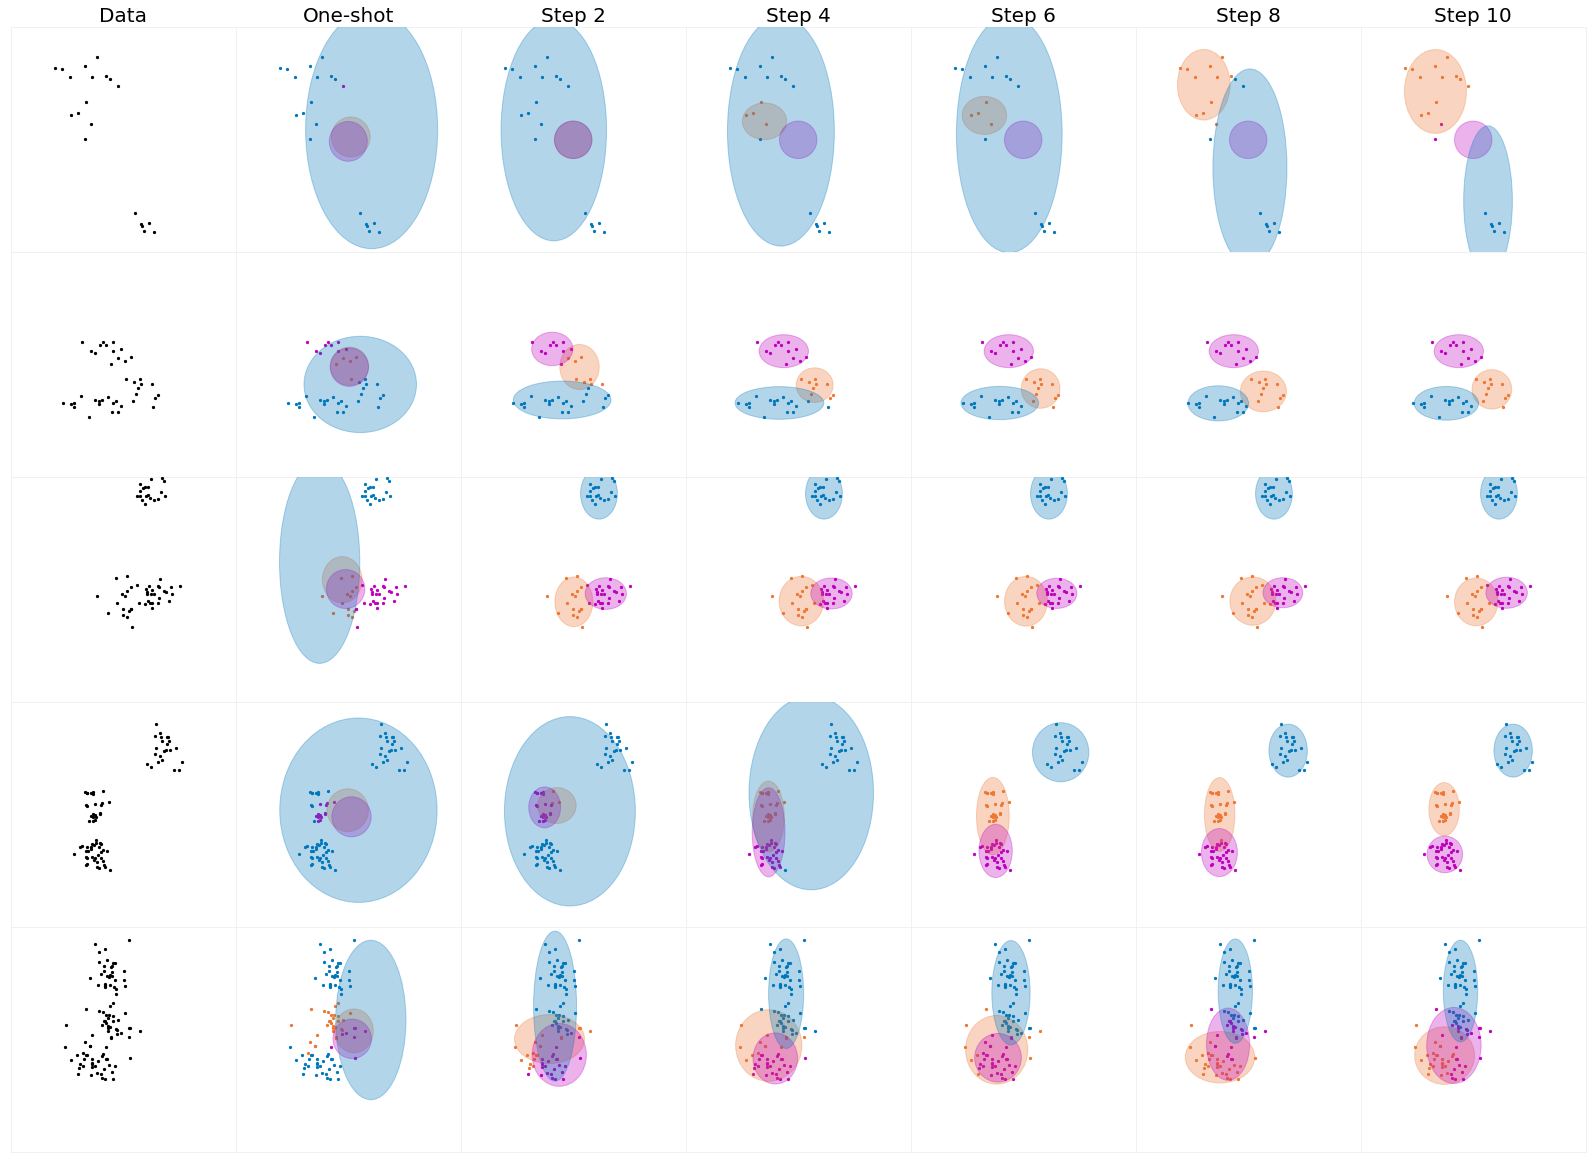

In [5]:
from plots_mc import *

BATCH_SIZE = 5
MCMC_STEPS = 10 ## 12 is maximum mcmc steps
VIS_INTERVAL = 2
FS = 25
TITLE_FS = 20
OB_MS = 5.0
MU_MARKER = 'X'
MU_MS = 100
OPACITY = 0.3
BOUND = 12
COLORS = ['#EE7733', 'm', '#0077BB', '#009988']
DATA_PTR = 52

plot_obj = Plot_MC(models, K, D, 1, BATCH_SIZE, MCMC_STEPS, VIS_INTERVAL, FS, TITLE_FS, OB_MS, OPACITY, BOUND, COLORS, CUDA, DEVICE)
plot_obj.plot_chains(Data, K, DATA_PTR)
plt.savefig('gmm_samples.pdf')